In [1]:
import sys, os
import numpy as np

sys.path.append(os.path.join(os.path.pardir, 'python'))
from tcg_slb.phasediagram.equilibrate import EquilibratePD, EquilibratePDGrid, PDEquilibrateGridDiagnostics
from tcg_slb.base import *

/Users/cwilson/Work/thermoengine/tcg_model_integration/python3.9/lib/python3.9/site-packages/numdifftools/multicomplex.py:35: DeprecationWarning: `finfo.machar` is deprecated (NumPy 1.22)
  _TINY = np.finfo(float).machar.tiny


In [2]:
from thermoengine.equilibrate import PhaseLibrary
import thermoengine as thermo

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Setup Equilibrate

In [3]:
db = thermo.model.Database(database='Stixrude')
all_phases = db.get_all_phases()
phase_library = PhaseLibrary(all_phases)

In [4]:
eq = EquilibratePD(phase_library)

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Temperature, pressure, composition

In [7]:
# initial temperature, pressure and composition
Ti = 1150.                # Kelvin
pi = GPa2Bar(23.5)         # bars
comp = thermo.OxideMolComp(SiO2=1, MgO=2)

### Solve the minimum Gibbs energy

In [8]:
eq.solve(Ti,pi,comp)

In [9]:
eq.final_rho(), eq.final_phases()

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/cwilson/Work/thermoengine/tcg_model_integration/python3.9/lib/python3.9/site-packages/thermoengine/samples.py:612: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([samp.X for samp in self.samples])


(40.86097337995816, (['Akimotoite', 'Ferropericlase'], ['AkiS', 'Fp']))

## Solve for a grid

In [10]:
reload = False

import pickle

filename = os.path.join('output', 'equilibrate_te_mg2sio4_lowp.pickle')

if reload:
    pfile = open(filename, 'rb')
    equilgrid = pickle.load(pfile)
    pfile.close()
else:
    p_n = 60
    p_min = 0.0 + 0.5*29/p_n
    p_max = 29.0 - 0.5*29/p_n
    p_range = np.linspace(p_min, p_max, p_n)
    T_n = 50
    T_min =  800. + 0.5*2000/T_n
    T_max = 2800. - 0.5*2000/T_n
    T_range = np.linspace(T_min, T_max, T_n)
    end = 1e5
    equilgrid = EquilibratePDGrid()
    equilgrid.solve(phase_library, ['p', 'T'], p_range, T_range, **{'comp':comp_bse})

In [11]:
save = True

if not reload and save:
        pfile = open(filename, 'wb')
        pickle.dump(equilgrid, pfile)
        pfile.close()

In [12]:
import matplotlib.pyplot as plt

def decorate(pdrgd):
    def new_setup_axes(self,axi):
        img = plt.imread("figures/slb_figure9a.png")
        ip = axi.imshow(img)
        axi.axis('off')
        ax = axi.inset_axes([0.001,0.005,0.998,0.993])
        ax.patch.set_alpha(0.0)
        ax.set_xlim([0.0, 29.0])
        ax.set_ylim([800.0, 2800.0])
        ax.set_ylabel("Temperature (K)")
        ax.set_xlabel("Pressure (GPa)")
        return ax
    
    #replace the display with newdisplay
    pdrgd.setup_axes = new_setup_axes
    
    #return the modified student 
    return pdrgd

equildiag = decorate(PDEquilibrateGridDiagnostics)(phase_library,equilgrid)

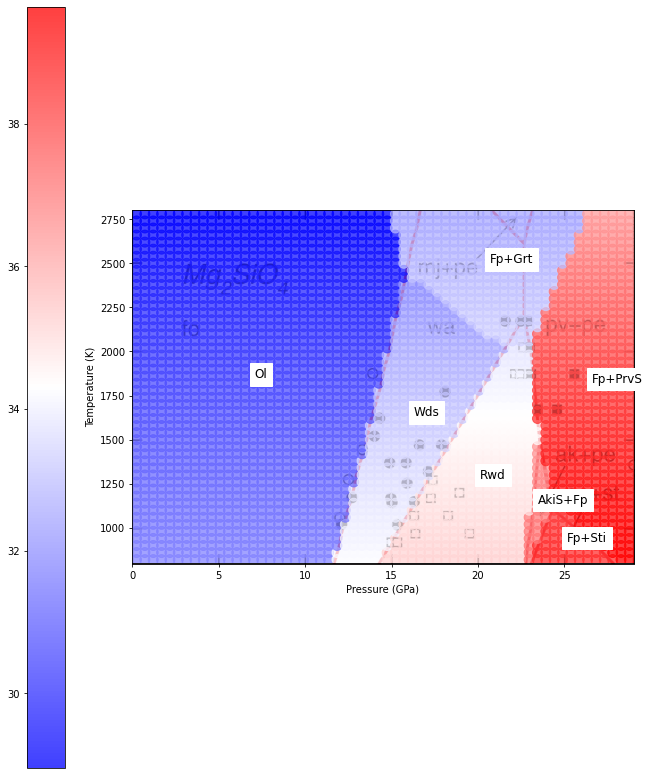

In [13]:
equildiag.plot_rho()

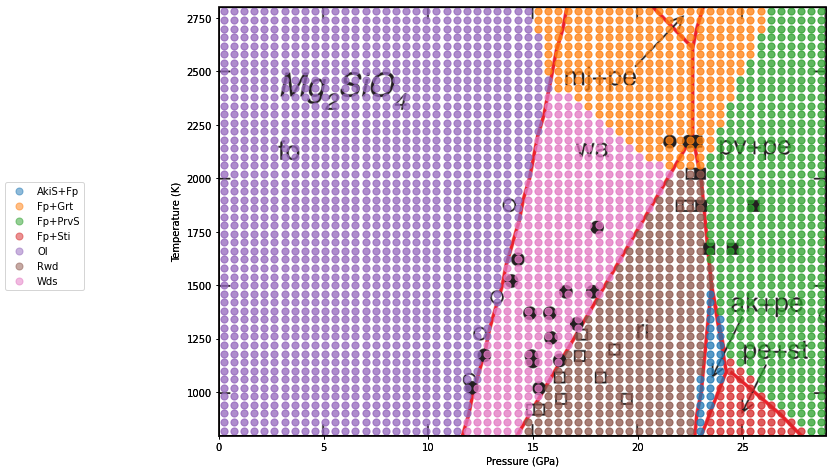

In [14]:
#%matplotlib widget
equildiag.plot_phases()

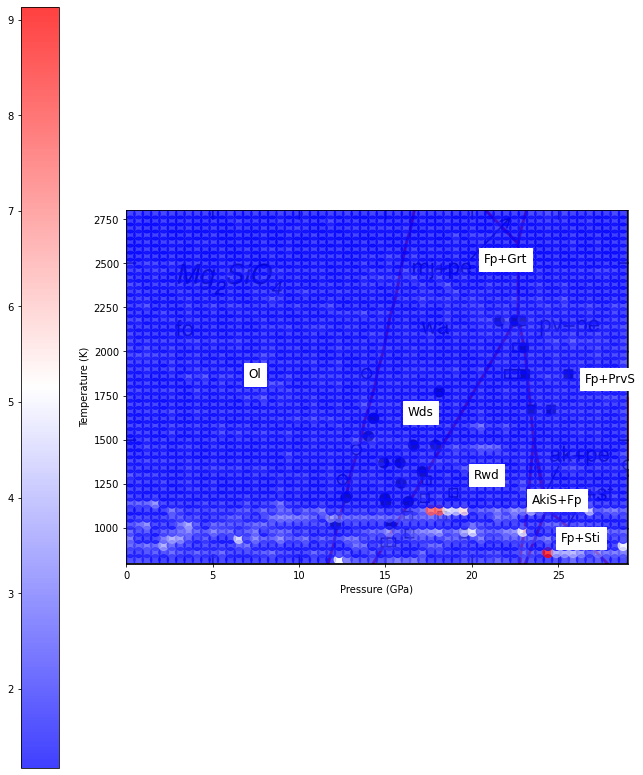

In [15]:
%matplotlib inline
equildiag.plot_stime()